In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [4]:
# To load the dataset.
df = pd.read_csv("UK_Accident.csv")
# To get the basic inforation about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [5]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [6]:
df = df.dropna()

In [7]:
l = LabelEncoder()

In [8]:
rt=l.fit_transform(df["Road_Type"])
jc=l.fit_transform(df["Junction_Control"])
lc=l.fit_transform(df["Light_Conditions"])
wc=l.fit_transform(df["Weather_Conditions"])
rsc=l.fit_transform(df["Road_Surface_Conditions"])
scs=l.fit_transform(df["Special_Conditions_at_Site"])
pchc=l.fit_transform(df["Pedestrian_Crossing-Human_Control"])
pcpf=l.fit_transform(df["Pedestrian_Crossing-Physical_Facilities"])    
ch=l.fit_transform(df["Carriageway_Hazards"])
ti=l.fit_transform(df["Time"])
da=l.fit_transform(df["Date"])
lah=l.fit_transform(df["Local_Authority_(Highway)"])
lsoa=l.fit_transform(df["LSOA_of_Accident_Location"])
po=l.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])

In [9]:
df["Road_Type"] = rt
df["Junction_Control"] = jc
df["Light_Conditions"] = lc
df["Weather_Conditions"] = wc
df["Road_Surface_Conditions"] = rsc
df["Special_Conditions_at_Site"] = scs
df["Pedestrian_Crossing-Human_Control"] = pchc
df["Pedestrian_Crossing-Physical_Facilities"] = pcpf
df["Carriageway_Hazards"] = ch
df["Time"] = ti
df["Date"] = da
df["Local_Authority_(Highway)"] = lah
df["LSOA_of_Accident_Location"] = lsoa
df["Did_Police_Officer_Attend_Scene_of_Accident"] = po

<AxesSubplot:>

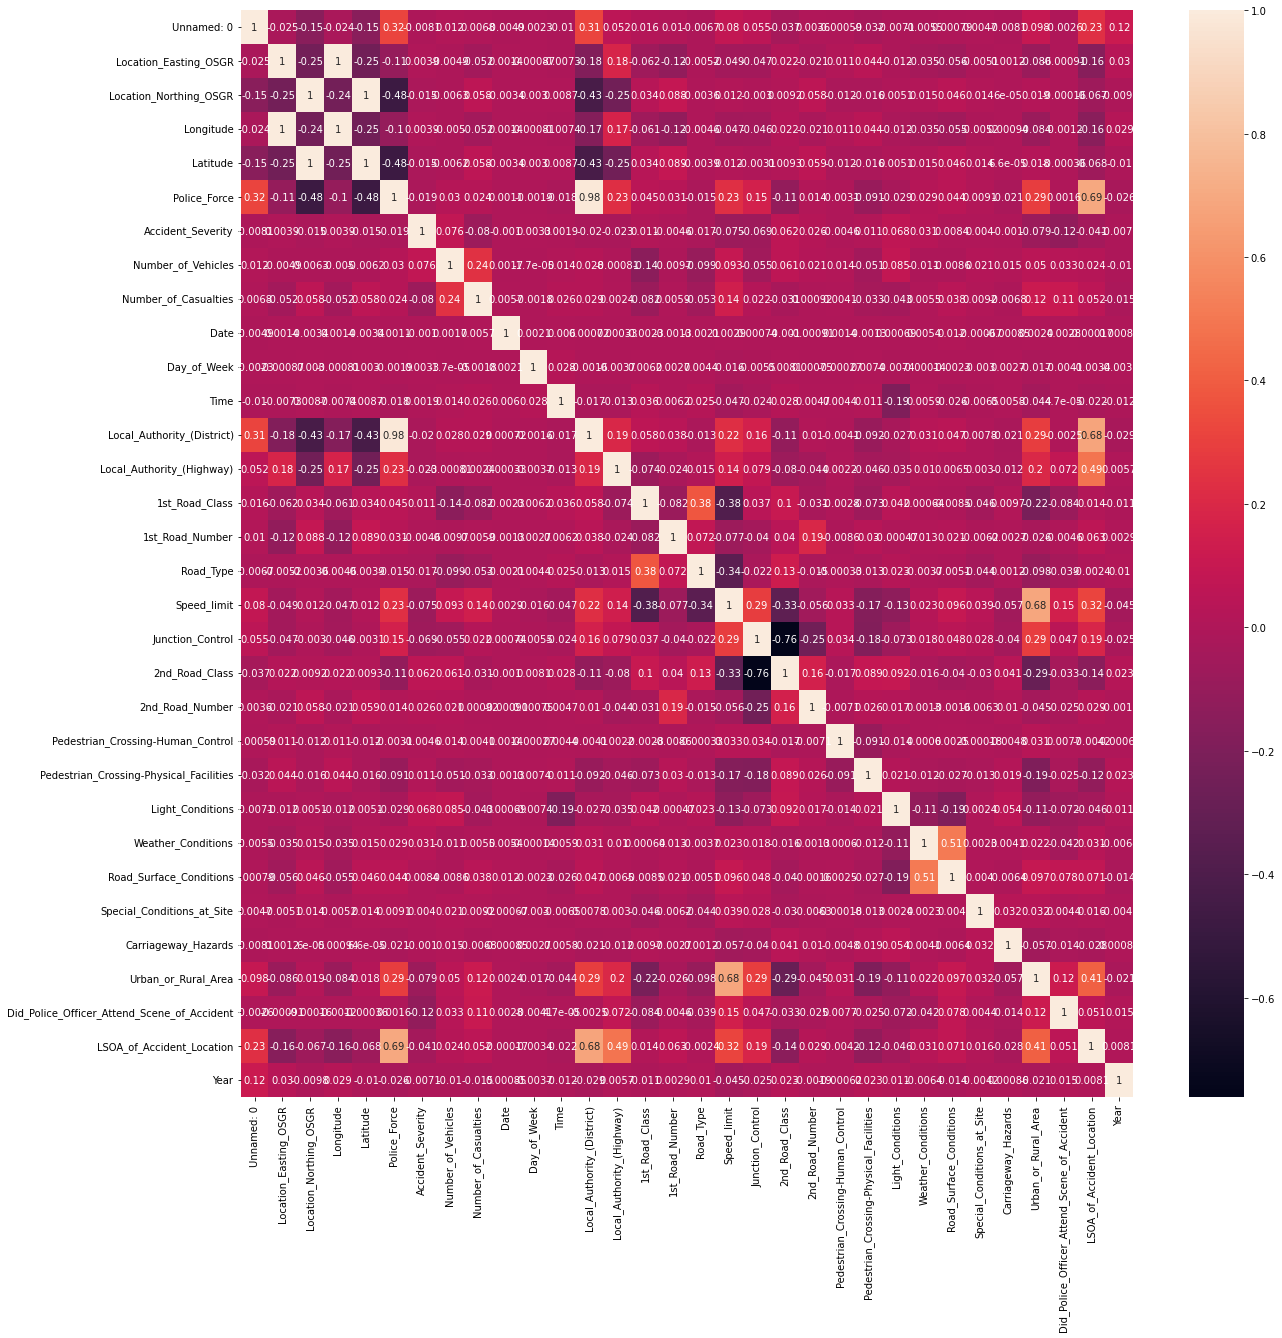

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.isnull().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [12]:
df.isna().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [13]:
df = df.drop("Unnamed: 0",axis=1)

In [14]:
df = df.drop("Accident_Index",axis=1)

In [15]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,324,3,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,432,4,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,540,5,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,648,6,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,972,2,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,3,1,3,98,7,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,3,1,2,962,1,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,3,2,1,971,3,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,3,2,1,2267,1,...,2,2,8,5,3,3,2,0,33989,2014


In [16]:
df['Accident_Severity'] = df['Accident_Severity'].replace([1,2,3], [2,1,0])

In [17]:
x = df.iloc[:,df.columns != 'Accident_Severity']
y = df.iloc[:,df.columns == 'Accident_Severity']

In [18]:
x

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.0,178240.0,-0.191170,51.489096,1,1,1,324,3,1061,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.0,181650.0,-0.211708,51.520075,1,1,1,432,4,1055,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.0,182240.0,-0.206458,51.525301,1,2,1,540,5,14,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.0,177530.0,-0.173862,51.482442,1,1,1,648,6,634,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.0,179040.0,-0.156618,51.495752,1,1,1,972,2,1272,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,314240.0,293390.0,-3.265712,52.531575,63,1,3,98,7,1244,...,2,0,5,5,3,3,2,1,33981,2014
1495357,313050.0,291200.0,-3.282677,52.511702,63,1,2,962,1,1133,...,2,0,1,0,3,3,2,1,33980,2014
1495358,315230.0,326460.0,-3.259644,52.828952,63,2,1,971,3,1194,...,2,0,5,5,3,3,2,1,35404,2014
1495359,303140.0,228320.0,-3.410628,51.944879,63,2,1,2267,1,1119,...,2,2,8,5,3,3,2,0,33989,2014


In [19]:
y

,Accident_Severity
0,1
1,0
2,0
3,0
4,0
...,...
1495356,0
1495357,0
1495358,0
1495359,0


In [20]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1395848
Number of rows after drop of duplicates: 1361690


In [21]:
y["Accident_Severity"].value_counts(normalize=True)*100

0    85.364667
1    13.387919
2     1.247414
Name: Accident_Severity, dtype: float64

In [22]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [23]:
X

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,525680.000000,178240.000000,-0.191170,51.489096,1,1,1,324,3,1061,...,4,4,5,5,3,3,1,1,2839,2005
1,524170.000000,181650.000000,-0.211708,51.520075,1,1,1,432,4,1055,...,3,2,1,0,3,3,1,1,2899,2005
2,524520.000000,182240.000000,-0.206458,51.525301,1,2,1,540,5,14,...,2,2,1,0,3,3,1,1,2847,2005
3,526900.000000,177530.000000,-0.173862,51.482442,1,1,1,648,6,634,...,2,4,1,0,3,3,1,1,2830,2005
4,528060.000000,179040.000000,-0.156618,51.495752,1,1,1,972,2,1272,...,2,1,1,5,3,3,1,1,2853,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574678,314938.605855,207463.359960,-3.233879,51.759330,61,1,1,1254,1,1026,...,2,3,1,0,3,3,1,1,34975,2008
3574679,284325.513572,180594.984920,-3.668371,51.512356,62,1,2,938,6,951,...,2,0,1,0,3,3,2,1,34489,2010
3574680,455137.288336,204855.672076,-1.202878,51.739655,43,5,11,2804,5,1207,...,2,3,1,1,3,3,2,1,28624,2005
3574681,358405.409525,406976.721619,-2.629387,53.557747,6,2,2,333,1,297,...,2,2,1,0,3,3,1,1,6327,2006


In [24]:
Y

,Accident_Severity
0,1
1,0
2,0
3,0
4,0
...,...
3574678,2
3574679,2
3574680,2
3574681,2


In [25]:
Y["Accident_Severity"].value_counts(normalize=True)*100

1    33.333333
0    33.333333
2    33.333333
Name: Accident_Severity, dtype: float64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=0)

In [27]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scale=MinMaxScaler().fit(x_train)

In [28]:
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_train

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0.527608,0.227685,0.513219,0.233659,0.218750,0.000000,0.01087,0.329072,0.500000,0.761474,...,0.4,0.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.913289,0.888889
1,0.782940,0.137947,0.770753,0.143068,0.000000,0.015152,0.00000,0.572907,0.000000,0.712796,...,0.4,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.111083,0.111111
2,0.461066,0.199531,0.445373,0.205497,0.218750,0.015152,0.00000,0.932116,0.666667,0.748261,...,0.4,1.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.396293,0.111111
3,0.612567,0.114407,0.598880,0.121028,0.447917,0.000000,0.00000,0.615830,0.500000,0.451321,...,0.2,0.75,0.250,1.0,0.428571,0.6,0.0,1.0,0.653635,0.777778
4,0.823316,0.138057,0.811382,0.142634,0.468750,0.015152,0.01087,0.277930,0.500000,0.712100,...,0.4,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.679529,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2502273,0.867683,0.152827,0.857106,0.156597,0.427083,0.000000,0.00000,0.034399,0.833333,0.545202,...,0.8,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.618290,0.222222
2502274,0.782887,0.148157,0.771260,0.153207,0.000000,0.015152,0.00000,0.448402,0.333333,0.330320,...,0.4,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.078136,0.777778
2502275,0.751444,0.164933,0.740344,0.170232,0.416667,0.000000,0.00000,0.878843,0.166667,0.573018,...,0.4,1.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.667739,1.000000
2502276,0.799323,0.170577,0.789166,0.175254,0.416667,0.015152,0.00000,0.361035,0.166667,0.694019,...,0.2,1.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.661392,0.222222


In [29]:
x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
x_test

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0.447649,0.381688,0.426958,0.386331,0.031250,0.000000,0.000000,0.893760,0.166667,0.929068,...,0.4,0.50,0.125,0.0,0.428571,0.6,1.0,1.0,0.707625,0.555556
1,0.528920,0.233232,0.514542,0.239169,0.197917,0.000000,0.000000,0.289802,0.333333,0.831015,...,0.4,0.50,0.125,0.4,0.428571,0.6,0.0,1.0,0.276240,0.888889
2,0.778570,0.149836,0.766996,0.154928,0.000000,0.000000,0.000000,0.794216,0.333333,0.679416,...,0.4,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.078813,1.000000
3,0.773783,0.117775,0.760485,0.123149,0.458333,0.000000,0.000000,0.203957,0.666667,0.410292,...,0.4,1.00,0.125,0.0,0.428571,0.6,0.0,1.0,0.861217,0.222222
4,0.271608,0.095163,0.258672,0.100025,0.510417,0.015152,0.000000,0.943379,0.166667,0.625174,...,0.4,1.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.571352,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072400,0.602171,0.361433,0.591771,0.366427,0.125000,0.015152,0.021739,0.620091,0.666667,0.536857,...,0.6,0.75,0.125,0.0,0.428571,0.6,0.0,1.0,0.319935,0.777778
1072401,0.592489,0.470225,0.582814,0.474482,0.093750,0.000000,0.000000,0.549772,0.166667,0.524339,...,0.6,1.00,0.125,0.0,0.428571,0.6,0.0,0.0,0.236044,0.777778
1072402,0.694675,0.200425,0.684084,0.206012,0.437500,0.015152,0.032609,0.661796,0.000000,0.600834,...,0.4,0.75,0.125,0.0,0.428571,0.6,1.0,1.0,0.472765,0.000000
1072403,0.856155,0.168137,0.846587,0.171984,0.427083,0.015152,0.000000,0.968645,0.166667,0.552156,...,0.4,1.00,0.125,0.0,0.428571,0.6,1.0,1.0,0.606668,0.555556


In [30]:
accuracy = dict()

# XGBClassifier

In [31]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [32]:
y_pred = model.predict(x_test, iteration_range=(1, 3))
print('Accuracy of XGBoost:',accuracy_score(y_test, y_pred))

Accuracy of XGBoost: 0.6391577808756953


In [33]:
from sklearn.metrics import roc_auc_score

print('Classification Report of XGBoost:')
print(classification_report(y_test, y_pred))

Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74    357442
           1       0.58      0.41      0.48    357231
           2       0.61      0.74      0.67    357732

    accuracy                           0.64   1072405
   macro avg       0.63      0.64      0.63   1072405
weighted avg       0.63      0.64      0.63   1072405



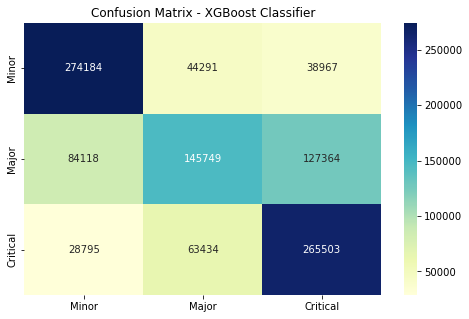

In [34]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

# LogisticRegression

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [36]:
model = LogisticRegression(random_state=0).fit(x, y)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = model.predict(x_test)
print('Accuracy of Logistic Regression:',accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.5571561117301765


In [38]:
from sklearn.metrics import roc_auc_score

print('Classification Report of LogisticRegression Classifier:')
print(classification_report(y_test, y_pred))

Classification Report of LogisticRegression Classifier:
              precision    recall  f1-score   support

           0       0.59      0.64      0.61    357442
           1       0.49      0.40      0.44    357231
           2       0.58      0.64      0.61    357732

    accuracy                           0.56   1072405
   macro avg       0.55      0.56      0.55   1072405
weighted avg       0.55      0.56      0.55   1072405



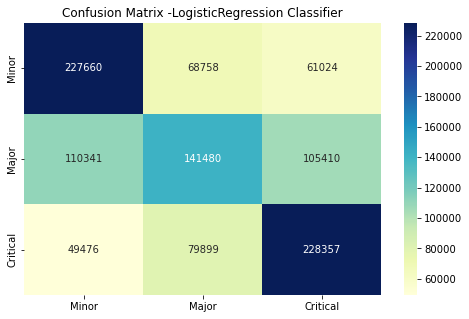

In [39]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -LogisticRegression Classifier")
plt.show()

# DecisionTreeClassifier

In [40]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [41]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred = model.predict(x_test)
print('Accuracy of Decision Tree:',accuracy_score(y_test, y_pred))

Accuracy of Decision Tree: 0.8298348105426588


In [43]:
from sklearn.metrics import roc_auc_score

print('Classification Report of Decision Tree Classifier:')
print(classification_report(y_test, y_pred))

Classification Report of Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80    357442
           1       0.77      0.76      0.77    357231
           2       0.89      0.95      0.92    357732

    accuracy                           0.83   1072405
   macro avg       0.83      0.83      0.83   1072405
weighted avg       0.83      0.83      0.83   1072405



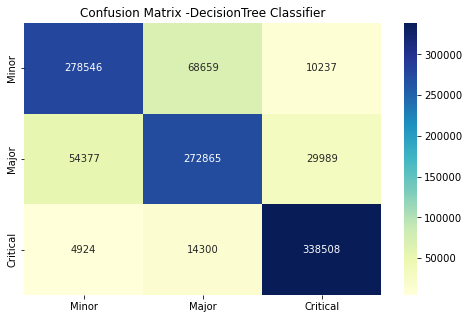

In [44]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix -DecisionTree Classifier")
plt.show()

# RandomForestClassifier

In [45]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [46]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [47]:
y_pred = model.predict(x_test)
print('Accuracy  of Ranom Forest:',accuracy_score(y_test, y_pred))

Accuracy  of Ranom Forest: 0.8968346846573823


In [48]:
from sklearn.metrics import roc_auc_score

print('Classification Report of RandomForestClassifier:')
print(classification_report(y_test, y_pred))

Classification Report of RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89    357442
           1       0.92      0.78      0.84    357231
           2       0.93      0.98      0.95    357732

    accuracy                           0.90   1072405
   macro avg       0.90      0.90      0.90   1072405
weighted avg       0.90      0.90      0.90   1072405



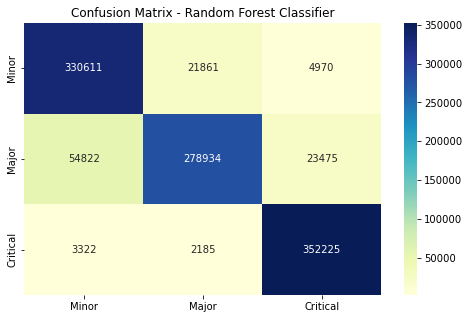

In [49]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

In [93]:
y_pred

array([0, 1, 2, ..., 2, 2, 0], dtype=int64)

In [50]:
y_pred

array([1, 1, 0, ..., 2, 0, 0], dtype=int64)

# Steps to improve Accuracy

In [51]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [52]:
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

In [53]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [54]:
# To load the dataset.
df = pd.read_csv("UK_Accident.csv")
# To get the basic inforation about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [55]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


1. Extracting Day from Date

In [56]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [57]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,4
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,5
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,6
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,7
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014,7
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014,11
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014,9
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,17


2. Extracting Month from Date

In [58]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [59]:
df['Month']

0           1
1           1
2           1
3           1
4           1
           ..
1504145    12
1504146    12
1504147    12
1504148    12
1504149    12
Name: Month, Length: 1504150, dtype: int64

In [60]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day,Month
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005,4,1
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005,5,1
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005,6,1
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005,7,1
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014,7,12
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,Fine without high winds,Snow,None,None,2,Yes,NaN,2014,11,12
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014,9,12
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014,17,12


3. Grouping Months with respect to four Seasons.

In [61]:
df['NMonth'] = df['Month'].replace([[1,2,12],[3,4,5],[6,7,8],[9,10,11]], [1,2,3,4])

In [62]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day,Month,NMonth
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Wet/Damp,None,None,1,Yes,E01002849,2005,4,1,1
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Dry,None,None,1,Yes,E01002909,2005,5,1,1
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,Dry,None,None,1,Yes,E01002857,2005,6,1,1
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,Dry,None,None,1,Yes,E01002840,2005,7,1,1
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,Wet/Damp,None,None,1,Yes,E01002863,2005,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,Snow,None,None,2,Yes,NaN,2014,7,12,1
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,Snow,None,None,2,Yes,NaN,2014,11,12,1
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,Frost/Ice,None,None,2,Yes,NaN,2014,9,12,1
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,Wet/Damp,None,None,2,Yes,NaN,2014,17,12,1


4. Remove  rows having null values

In [63]:
df = df.dropna()

In [64]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day,Month,NMonth
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Wet/Damp,None,None,1,Yes,E01002849,2005,4,1,1
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Dry,None,None,1,Yes,E01002909,2005,5,1,1
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,Dry,None,None,1,Yes,E01002857,2005,6,1,1
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,Dry,None,None,1,Yes,E01002840,2005,7,1,1
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,Wet/Damp,None,None,1,Yes,E01002863,2005,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,455903,201463DP40114,314240.0,293390.0,-3.265712,52.531575,63,3,1,3,...,Wet/Damp,None,None,2,Yes,W01000481,2014,1,11,4
1495357,455904,201463DP40214,313050.0,291200.0,-3.282677,52.511702,63,3,1,2,...,Dry,None,None,2,Yes,W01000480,2014,9,11,4
1495358,455905,201463DP40314,315230.0,326460.0,-3.259644,52.828952,63,3,2,1,...,Wet/Damp,None,None,2,Yes,W01001907,2014,9,12,1
1495359,455906,201463DP40414,303140.0,228320.0,-3.410628,51.944879,63,3,2,1,...,Wet/Damp,None,None,2,No,W01000489,2014,21,12,1


In [65]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1395848
Number of rows after drop of duplicates: 1395848


5. Converting categorical data to numerical data.

In [66]:
l = LabelEncoder()

rt=l.fit_transform(df["Road_Type"])
jc=l.fit_transform(df["Junction_Control"])
lc=l.fit_transform(df["Light_Conditions"])
wc=l.fit_transform(df["Weather_Conditions"])
rsc=l.fit_transform(df["Road_Surface_Conditions"])
scs=l.fit_transform(df["Special_Conditions_at_Site"])
pchc=l.fit_transform(df["Pedestrian_Crossing-Human_Control"])
pcpf=l.fit_transform(df["Pedestrian_Crossing-Physical_Facilities"])    
ch=l.fit_transform(df["Carriageway_Hazards"])
ti=l.fit_transform(df["Time"])
da=l.fit_transform(df["Date"])
lah=l.fit_transform(df["Local_Authority_(Highway)"])
lsoa=l.fit_transform(df["LSOA_of_Accident_Location"])
po=l.fit_transform(df["Did_Police_Officer_Attend_Scene_of_Accident"])

In [67]:
df["Road_Type"] = rt
df["Junction_Control"] = jc
df["Light_Conditions"] = lc
df["Weather_Conditions"] = wc
df["Road_Surface_Conditions"] = rsc
df["Special_Conditions_at_Site"] = scs
df["Pedestrian_Crossing-Human_Control"] = pchc
df["Pedestrian_Crossing-Physical_Facilities"] = pcpf
df["Carriageway_Hazards"] = ch
df["Time"] = ti
df["Date"] = da
df["Local_Authority_(Highway)"] = lah
df["LSOA_of_Accident_Location"] = lsoa
df["Did_Police_Officer_Attend_Scene_of_Accident"] = po

6. Finding Correlation

In [68]:
df.corr()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day,Month,NMonth
Unnamed: 0,1.000000,-0.024773,-0.152674,-0.023544,-0.152577,0.317887,-0.008062,0.011712,0.006839,0.164660,...,0.000785,0.004698,-0.008120,0.098134,-0.002578,0.231956,0.118672,-0.005396,0.000660,-0.000668
Location_Easting_OSGR,-0.024773,1.000000,-0.245539,0.999773,-0.249451,-0.106021,0.003950,-0.004884,-0.052180,0.031269,...,-0.056005,-0.005069,0.001157,-0.085811,-0.000911,-0.157379,0.029687,0.001105,0.005934,0.005654
Location_Northing_OSGR,-0.152674,-0.245539,1.000000,-0.241759,0.999964,-0.480626,-0.015131,-0.006334,0.058174,-0.010848,...,0.046345,0.013606,0.000060,0.018836,-0.000164,-0.067425,-0.009842,-0.003159,-0.005371,-0.008998
Longitude,-0.023544,0.999773,-0.241759,1.000000,-0.245708,-0.103438,0.003853,-0.005004,-0.051791,0.030964,...,-0.055445,-0.005156,0.000944,-0.083606,-0.001217,-0.155835,0.029370,0.001097,0.005953,0.005618
Latitude,-0.152577,-0.249451,0.999964,-0.245708,1.000000,-0.480642,-0.015117,-0.006192,0.058227,-0.011017,...,0.046357,0.013624,0.000066,0.018287,-0.000356,-0.067800,-0.010009,-0.003152,-0.005405,-0.009025
Police_Force,0.317887,-0.106021,-0.480626,-0.103438,-0.480642,1.000000,-0.018514,0.029607,0.024050,-0.026115,...,0.043877,0.009112,-0.021230,0.291068,0.001628,0.692953,-0.026283,0.000993,0.003781,-0.001192
Accident_Severity,-0.008062,0.003950,-0.015131,0.003853,-0.015117,-0.018514,1.000000,0.075558,-0.079944,-0.007664,...,0.008411,0.004045,-0.001032,-0.078520,-0.115619,-0.041395,-0.007066,-0.000976,-0.001677,-0.005648
Number_of_Vehicles,0.011712,-0.004884,-0.006334,-0.005004,-0.006192,0.029607,0.075558,1.000000,0.239361,-0.009208,...,-0.008626,0.020626,0.015453,0.049501,0.032906,0.023917,-0.010479,0.001556,0.005894,0.016550
Number_of_Casualties,0.006839,-0.052180,0.058174,-0.051791,0.058227,0.024050,-0.079944,0.239361,1.000000,-0.014663,...,0.037865,0.009218,-0.006817,0.117301,0.106734,0.052015,-0.014571,0.005756,0.000923,-0.001415
Date,0.164660,0.031269,-0.010848,0.030964,-0.011017,-0.026115,-0.007664,-0.009208,-0.014663,1.000000,...,-0.004715,-0.004773,0.001222,-0.020651,0.016622,0.009475,0.990152,0.004372,0.109492,0.068246


<AxesSubplot:>

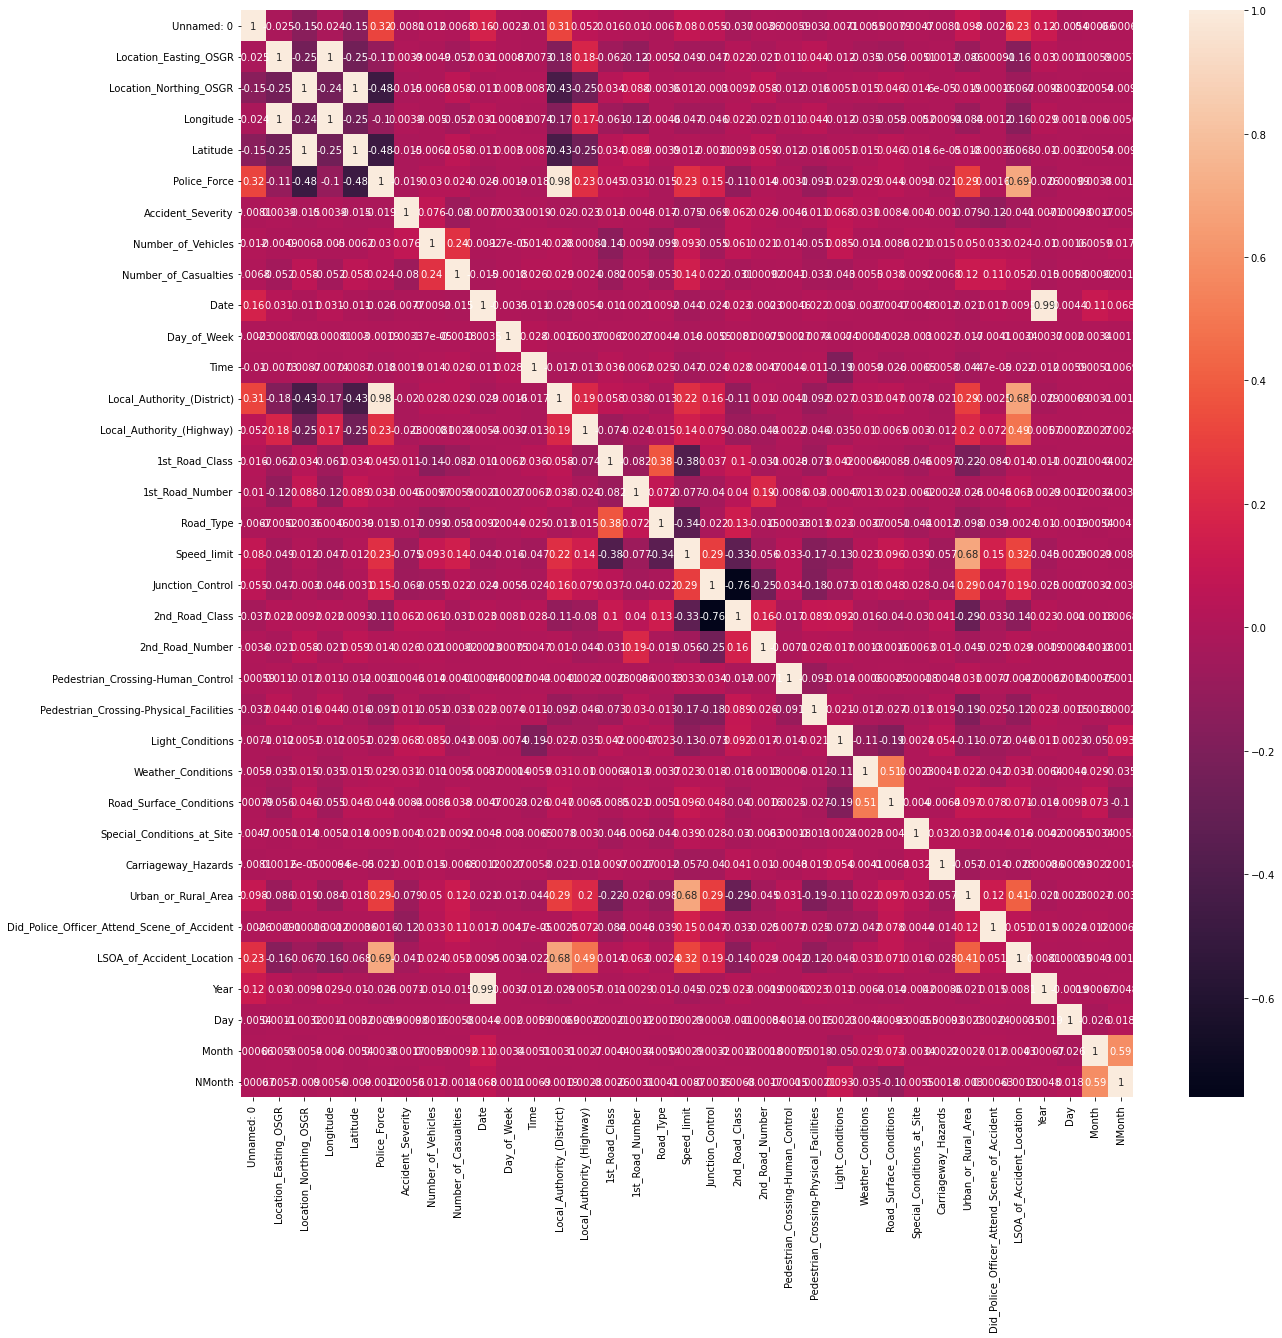

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

7. Converting multiple class to binary class.

In [70]:
df['Accident_Severity'] = df['Accident_Severity'].replace([1,2,3], [2,1,0])

In [71]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,Day,Month,NMonth
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,1,1,1,...,5,3,3,1,1,2839,2005,4,1,1
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,0,1,1,...,0,3,3,1,1,2899,2005,5,1,1
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,0,2,1,...,0,3,3,1,1,2847,2005,6,1,1
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,0,1,1,...,0,3,3,1,1,2830,2005,7,1,1
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,0,1,1,...,5,3,3,1,1,2853,2005,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495356,455903,201463DP40114,314240.0,293390.0,-3.265712,52.531575,63,0,1,3,...,5,3,3,2,1,33981,2014,1,11,4
1495357,455904,201463DP40214,313050.0,291200.0,-3.282677,52.511702,63,0,1,2,...,0,3,3,2,1,33980,2014,9,11,4
1495358,455905,201463DP40314,315230.0,326460.0,-3.259644,52.828952,63,0,2,1,...,5,3,3,2,1,35404,2014,9,12,1
1495359,455906,201463DP40414,303140.0,228320.0,-3.410628,51.944879,63,0,2,1,...,5,3,3,2,0,33989,2014,21,12,1


8. Feature selection

In [72]:
Ndf = df[['Accident_Severity','Number_of_Vehicles','1st_Road_Class','2nd_Road_Class','2nd_Road_Number','Pedestrian_Crossing-Physical_Facilities',
       'Light_Conditions','Weather_Conditions','Road_Surface_Conditions' ]]

In [73]:
Ndf

,Accident_Severity,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,1,1,3,-1,0,4,4,5,5
1,0,1,4,5,0,3,2,1,0
2,0,2,5,-1,0,2,2,1,0
3,0,1,3,-1,0,2,4,1,0
4,0,1,6,-1,0,2,1,1,5
...,...,...,...,...,...,...,...,...,...
1495356,0,1,4,-1,0,2,0,5,5
1495357,0,1,3,-1,0,2,0,1,0
1495358,0,2,4,-1,0,2,0,5,5
1495359,0,2,3,3,40,2,2,8,5


In [74]:
Ndf.isnull().sum()

Accident_Severity                          0
Number_of_Vehicles                         0
1st_Road_Class                             0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
dtype: int64

In [75]:
x = Ndf.iloc[:,Ndf.columns != 'Accident_Severity']
y = Ndf.iloc[:,Ndf.columns == 'Accident_Severity']

In [76]:
x

,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,1,3,-1,0,4,4,5,5
1,1,4,5,0,3,2,1,0
2,2,5,-1,0,2,2,1,0
3,1,3,-1,0,2,4,1,0
4,1,6,-1,0,2,1,1,5
...,...,...,...,...,...,...,...,...
1495356,1,4,-1,0,2,0,5,5
1495357,1,3,-1,0,2,0,1,0
1495358,2,4,-1,0,2,0,5,5
1495359,2,3,3,40,2,2,8,5


In [77]:
y

,Accident_Severity
0,1
1,0
2,0
3,0
4,0
...,...
1495356,0
1495357,0
1495358,0
1495359,0


In [78]:
Ndf

,Accident_Severity,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,1,1,3,-1,0,4,4,5,5
1,0,1,4,5,0,3,2,1,0
2,0,2,5,-1,0,2,2,1,0
3,0,1,3,-1,0,2,4,1,0
4,0,1,6,-1,0,2,1,1,5
...,...,...,...,...,...,...,...,...,...
1495356,0,1,4,-1,0,2,0,5,5
1495357,0,1,3,-1,0,2,0,1,0
1495358,0,2,4,-1,0,2,0,5,5
1495359,0,2,3,3,40,2,2,8,5


In [79]:
y["Accident_Severity"].value_counts(normalize=True)*100

0    85.364667
1    13.387919
2     1.247414
Name: Accident_Severity, dtype: float64

In [80]:
oversample = SMOTE()
X, Y = oversample.fit_resample(x, y)

In [81]:
X

,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,1,3,-1,0,4,4,5,5
1,1,4,5,0,3,2,1,0
2,2,5,-1,0,2,2,1,0
3,1,3,-1,0,2,4,1,0
4,1,6,-1,0,2,1,1,5
...,...,...,...,...,...,...,...,...
3574678,1,3,3,4200,3,2,1,2
3574679,1,3,6,0,2,4,1,0
3574680,1,3,-1,0,2,2,1,0
3574681,2,3,-1,0,2,4,5,5


In [82]:
Y

,Accident_Severity
0,1
1,0
2,0
3,0
4,0
...,...
3574678,2
3574679,2
3574680,2
3574681,2


In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=0)

In [84]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scale=MinMaxScaler().fit(x_train)

In [85]:
x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_train

,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,0.000000,1.0,0.000000,0.0001,0.4,0.5,0.125,0.0
1,0.015152,0.4,0.000000,0.0001,0.4,1.0,0.125,0.0
2,0.015152,1.0,1.000000,0.0001,0.4,1.0,0.125,0.0
3,0.015152,0.4,1.000000,0.7002,0.4,1.0,0.125,0.0
4,0.015152,0.6,1.000000,0.0001,0.4,1.0,0.125,0.0
...,...,...,...,...,...,...,...,...
2502273,0.015152,0.4,0.000000,0.0001,0.4,1.0,0.125,0.0
2502274,0.015152,0.8,0.000000,0.0001,0.4,1.0,0.125,0.0
2502275,0.000000,0.2,0.714286,0.1227,0.4,1.0,0.125,0.0
2502276,0.000000,0.4,0.000000,0.0001,0.4,1.0,0.125,1.0


In [86]:
x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
x_test

,Number_of_Vehicles,1st_Road_Class,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,0.015152,1.0,0.000000,0.0001,0.4,1.0,0.125,1.0
1,0.015152,0.8,1.000000,0.1070,0.4,1.0,0.125,0.0
2,0.000000,0.4,0.000000,0.0001,0.4,1.0,0.125,0.0
3,0.015152,0.4,0.000000,0.0001,0.4,1.0,0.125,0.0
4,0.015152,1.0,0.000000,0.0001,0.4,1.0,0.125,0.0
...,...,...,...,...,...,...,...,...
1072400,0.015152,0.6,1.000000,0.0072,0.6,0.5,0.125,0.0
1072401,0.000000,0.6,0.714286,0.1310,0.6,1.0,0.125,0.0
1072402,0.000000,0.4,0.000000,0.0001,0.4,0.0,0.125,0.0
1072403,0.015152,0.4,0.000000,0.0001,0.4,1.0,0.125,0.0


In [87]:
accuracy = dict()

In [88]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [89]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',max_depth=30,n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_jobs=-1)

In [90]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.5398799893696877

In [91]:
from sklearn.metrics import roc_auc_score

print('Classification Report:',classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.54      0.56      0.55    357442
           1       0.50      0.35      0.41    357231
           2       0.56      0.70      0.62    357732

    accuracy                           0.54   1072405
   macro avg       0.53      0.54      0.53   1072405
weighted avg       0.53      0.54      0.53   1072405



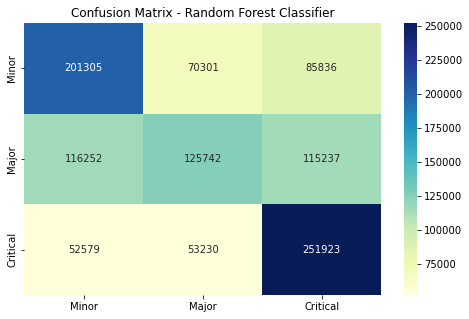

In [92]:
cm = confusion_matrix(y_test, y_pred)

index = ["Minor", "Major", "Critical"]
columns =  ["Minor", "Major", "Critical"]
conf_matrix = pd.DataFrame(data = cm,columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()